# Taylor series

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Introduction

Taylor expansion is a way to represent a function by a series of polynomials
$$
f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n
$$

where $f(x)$ is the function we want to expand, $x_0$ is the point at which we expand the function around, and $f^{(n)}(x)$ is the nth derivative.

Of course since we are dealing with computers we can't go to infinity, so we will define a number (nMax) at which we stop expanding the function.

## 1.1 Taylor Expansion of Exponential Function

lets start with exponential function as it's easy to expand as $f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=e^{x} $

In [3]:
def taylorExp(x,x0,nMax):
    constant=np.exp(x0)
    taylorSum=0
    for i in range(nMax+1):
        taylorSum=taylorSum+constant*x**i/np.math.factorial(i)
    return taylorSum

Comparing our defined taylorExp() function with the implemented np.exp() function using plots

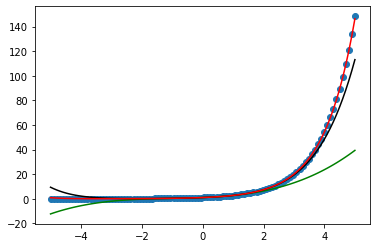

In [4]:
x1=np.linspace(-5,5,100)
plt.plot(x1,taylorExp(x1,0,3),'green')
plt.plot(x1,taylorExp(x1,0,6),'black')
plt.plot(x1,taylorExp(x1,0,10),'red')
plt.scatter(x1,np.exp(x1))

As we can see, as nMax approaches a bigger number, the difference becomes unnoticeable.

## 1.2 Taylor Expansion of Cos(x) at $x_{0}$=0

Lets now try a more complicated function, cos(x)

we now that $f(x)=f^{4}(x)$, as the cycle[1,0,-1,0] repeats itself
$$f(0)= f^{(4)}(0) = f^{(8)} \dots = \cos(0)=1$$
$$f'(0)= f^{(5)}(0)= f^{(9)}(0) = \dots = -\sin(0)=0$$
$$f''(0)= f^{(6)}(0)= f^{(10)}(0) = \dots = -\cos(0)=-1$$
$$f'''(0)= f^{(7)}(0)= f^{(11)}(0) = \dots = \sin(0)=0$$

so the series becomes:
$$f(x)=\sum_{n=0}^\infty (-1)^{n}\frac{x^{2n}}{(2n)!}$$

In [5]:
def taylorCos(x,nMax):
    #we don't need x0 term as this analysis is based on the fact that x0=0
    taylorSum=0
    for i in range(nMax+1):
        taylorSum=taylorSum+ ((-1)**i) * x**(2*i) /np.math.factorial(2*i)
    return taylorSum

We will compare again between our defined taylorCos() function and the implemented np.cos() function using plots

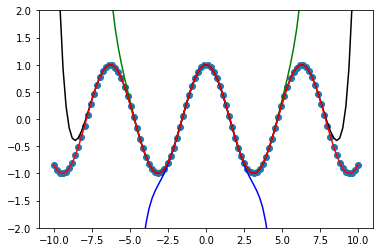

In [6]:
x1=np.linspace(-10,10,100)
plt.ylim(-2,2)
plt.plot(x1,taylorCos(x1,3),'blue')
plt.plot(x1,taylorCos(x1,6),'green')
plt.plot(x1,taylorCos(x1,10),'black')
plt.plot(x1,taylorCos(x1,20),'red')
plt.scatter(x1,np.cos(x1))

It's clear that as nMax approaches infinity, the error is decreasing, so even with more complicated functions, we can still use Taylor Expansion.

## 1.3 Taylor Expansion for a general function

### 1.3.1 Numerical Differentiation

To calculate the derivative of a function, we can use the (scipy.misc) library, or we can implement our own using one of the following methods:
- Forward Difference Method with a small step size(h):
$$ f'(x) = \frac{f(x+h) - f(x)}{h} $$
- Backward Difference Method with a small step size(h):
$$ f'(x) = \frac{f(x) - f(x-h)}{h} $$
- Central Difference Method with a small step size(h):
$$ f'(x) = \frac{f(x+h) - f(x-h)}{2h} $$

The central difference method is the most accurate as it's the average of the forward and backward difference methods, so the error is reduced.

In [7]:
def derivative(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

To calculate the higher order derivatives we can come up with a recursive solution or more easily use this formula:
$$ f^{(n)}(x) = \lim_{h \to 0} \frac{1}{h^{n}} \sum_{k=0}^n (-1)^{k+n} {n\choose k} f(x+kh) $$ 

which is based on Newton's difference quotient(Forward Difference Method).

In [8]:
def higherDerivative(f,x,h,n):
    sum=0
    for i in range(n+1):
        sum= sum + (-1)**(i+n) * np.math.factorial(n)/(np.math.factorial(i)*np.math.factorial(n-i)) * f(x+i*h) 
    return sum/(h**n)

if we used the higherDerivative() function to find the first order derivative and compared it with the derivative() function, the result maybe slightly different, as the formula that was used to implement the higherDerivative() function is based on the Forward Difference Method while the derivative function is based on the Central Difference Method.

### 1.3.2 Taylor Expansion for a general function

In [9]:
def taylorGen(f,x,x0,nMax,h):
    sum=0
    for n in range(nMax+1):
        sum= sum+ ((higherDerivative(f,x0,h,n) * (x-x0)**n)/np.math.factorial(n))
    return sum

In [10]:
def f(x):
    return x**2+np.cos(x)*4
    #random function

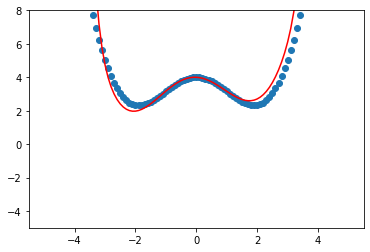

In [11]:
x1=np.linspace(-5,5,101)
plt.ylim([-5,8])
plt.plot(x1,taylorGen(f,x1,0,18,0.1),'red')
plt.scatter(x1,f(x1))

The matching starts good but of course the error increases as the higher order derivatives are calculated due to the numerical analysis, however it's good enough for our purposes.